**2. Dữ liệu môi trường của một nhà xưởng sản xuất được đo và trình bày trong tập tin đính kèm tb_tracking.xlsx. Thực hiện các thao tác tiền xử lý sau:**

a) Thêm vào tiêu đề các cột theo thứ tự: id (định danh của dòng dữ liệu), device_id (định danh của thiết bị đo), co_level (nồng độ khí CO), humidity (độ ẩm), temperature (nhiệt độ), time (thời điểm đo đạc).


In [6]:
import pandas as pd

column_names = ['id', 'device_id', 'co_level', 'humidity', 'temperature', 'time']

df = pd.read_excel('tb_tracking.xlsx', header=None)

df.columns = column_names

print("Huỳnh Thị Trúc Lam - 6351071040")
print("DataFrame loaded with new headers:")
print(df.head())

Huỳnh Thị Trúc Lam - 6351071040
DataFrame loaded with new headers:
    id  device_id  co_level  humidity  temperature                time
0  1.0        1.0       2.0       3.0          4.0 2016-12-20 12:52:29
1  2.0        1.0       2.0       3.0          4.0 2016-12-20 12:52:31
2  3.0      100.0       2.0       3.0          4.0 2016-12-20 12:52:35
3  4.0      100.0       2.0       3.0        400.0 2016-12-20 12:52:37
4  5.0        1.0       2.0       3.0          4.0 2016-12-20 13:02:01


b) Do điều chỉnh cảm biến nên dữ liệu đo được bắt đầu từ ngày 03/01/2018 mới chính xác. Những dữ liệu còn lại không có giá trị, yêu cầu sinh viên loại bỏ.


In [8]:
df['time'] = pd.to_datetime(df['time'])
start_date = '2018-01-03'
df_filtered = df[df['time'] >= start_date]

print("Huỳnh Thị Trúc Lam - 6351071040")
print("Filtered DataFrame head:")
print(df_filtered.head())
print("\nShape of the original DataFrame:", df.shape)
print("Shape of the filtered DataFrame:", df_filtered.shape)

Huỳnh Thị Trúc Lam - 6351071040
Filtered DataFrame head:
            id  device_id  co_level  humidity  temperature                time
31419  31420.0        1.0       2.0       3.0          4.0 2018-01-03 13:11:07
31420  31421.0        1.0       2.0       3.0          4.0 2018-01-03 13:15:10
31421  31422.0    99005.0      58.0      26.0          0.0 2018-01-03 13:17:30
31422  31423.0    99005.0      58.0      26.0          0.0 2018-01-03 13:19:21
31423  31424.0    99005.0      58.0      26.0          0.0 2018-01-03 13:24:17

Shape of the original DataFrame: (33340, 6)
Shape of the filtered DataFrame: (1918, 6)


c) Từ cột time sinh viên bóc tách dữ liệu thành thời điểm đo đạc trong ngày tính theo phút, đặt tên là minutes.

In [9]:
df_filtered['minutes'] = df_filtered['time'].dt.hour * 60 + df_filtered['time'].dt.minute
print("Huỳnh Thị Trúc Lam - 6351071040")
print("DataFrame with 'minutes' column:")
print(df_filtered.head())

Huỳnh Thị Trúc Lam - 6351071040
DataFrame with 'minutes' column:
            id  device_id  co_level  humidity  temperature  \
31419  31420.0        1.0       2.0       3.0          4.0   
31420  31421.0        1.0       2.0       3.0          4.0   
31421  31422.0    99005.0      58.0      26.0          0.0   
31422  31423.0    99005.0      58.0      26.0          0.0   
31423  31424.0    99005.0      58.0      26.0          0.0   

                     time  minutes  
31419 2018-01-03 13:11:07      791  
31420 2018-01-03 13:15:10      795  
31421 2018-01-03 13:17:30      797  
31422 2018-01-03 13:19:21      799  
31423 2018-01-03 13:24:17      804  


/tmp/ipython-input-1035361562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['minutes'] = df_filtered['time'].dt.hour * 60 + df_filtered['time'].dt.minute


In [10]:
df_filtered = df_filtered.copy()
df_filtered['minutes'] = df_filtered['time'].dt.hour * 60 + df_filtered['time'].dt.minute
print("DataFrame with 'minutes' column:")
print(df_filtered.head())

DataFrame with 'minutes' column:
            id  device_id  co_level  humidity  temperature  \
31419  31420.0        1.0       2.0       3.0          4.0   
31420  31421.0        1.0       2.0       3.0          4.0   
31421  31422.0    99005.0      58.0      26.0          0.0   
31422  31423.0    99005.0      58.0      26.0          0.0   
31423  31424.0    99005.0      58.0      26.0          0.0   

                     time  minutes  
31419 2018-01-03 13:11:07      791  
31420 2018-01-03 13:15:10      795  
31421 2018-01-03 13:17:30      797  
31422 2018-01-03 13:19:21      799  
31423 2018-01-03 13:24:17      804  


d) Vẽ đồ thị phân tán (scatter-plots) lần lượt biểu diễn dữ liệu nồng độ khí CO, độ ẩm và nhiệt độ theo cột minutes vừa tạo ở yêu cầu trên.

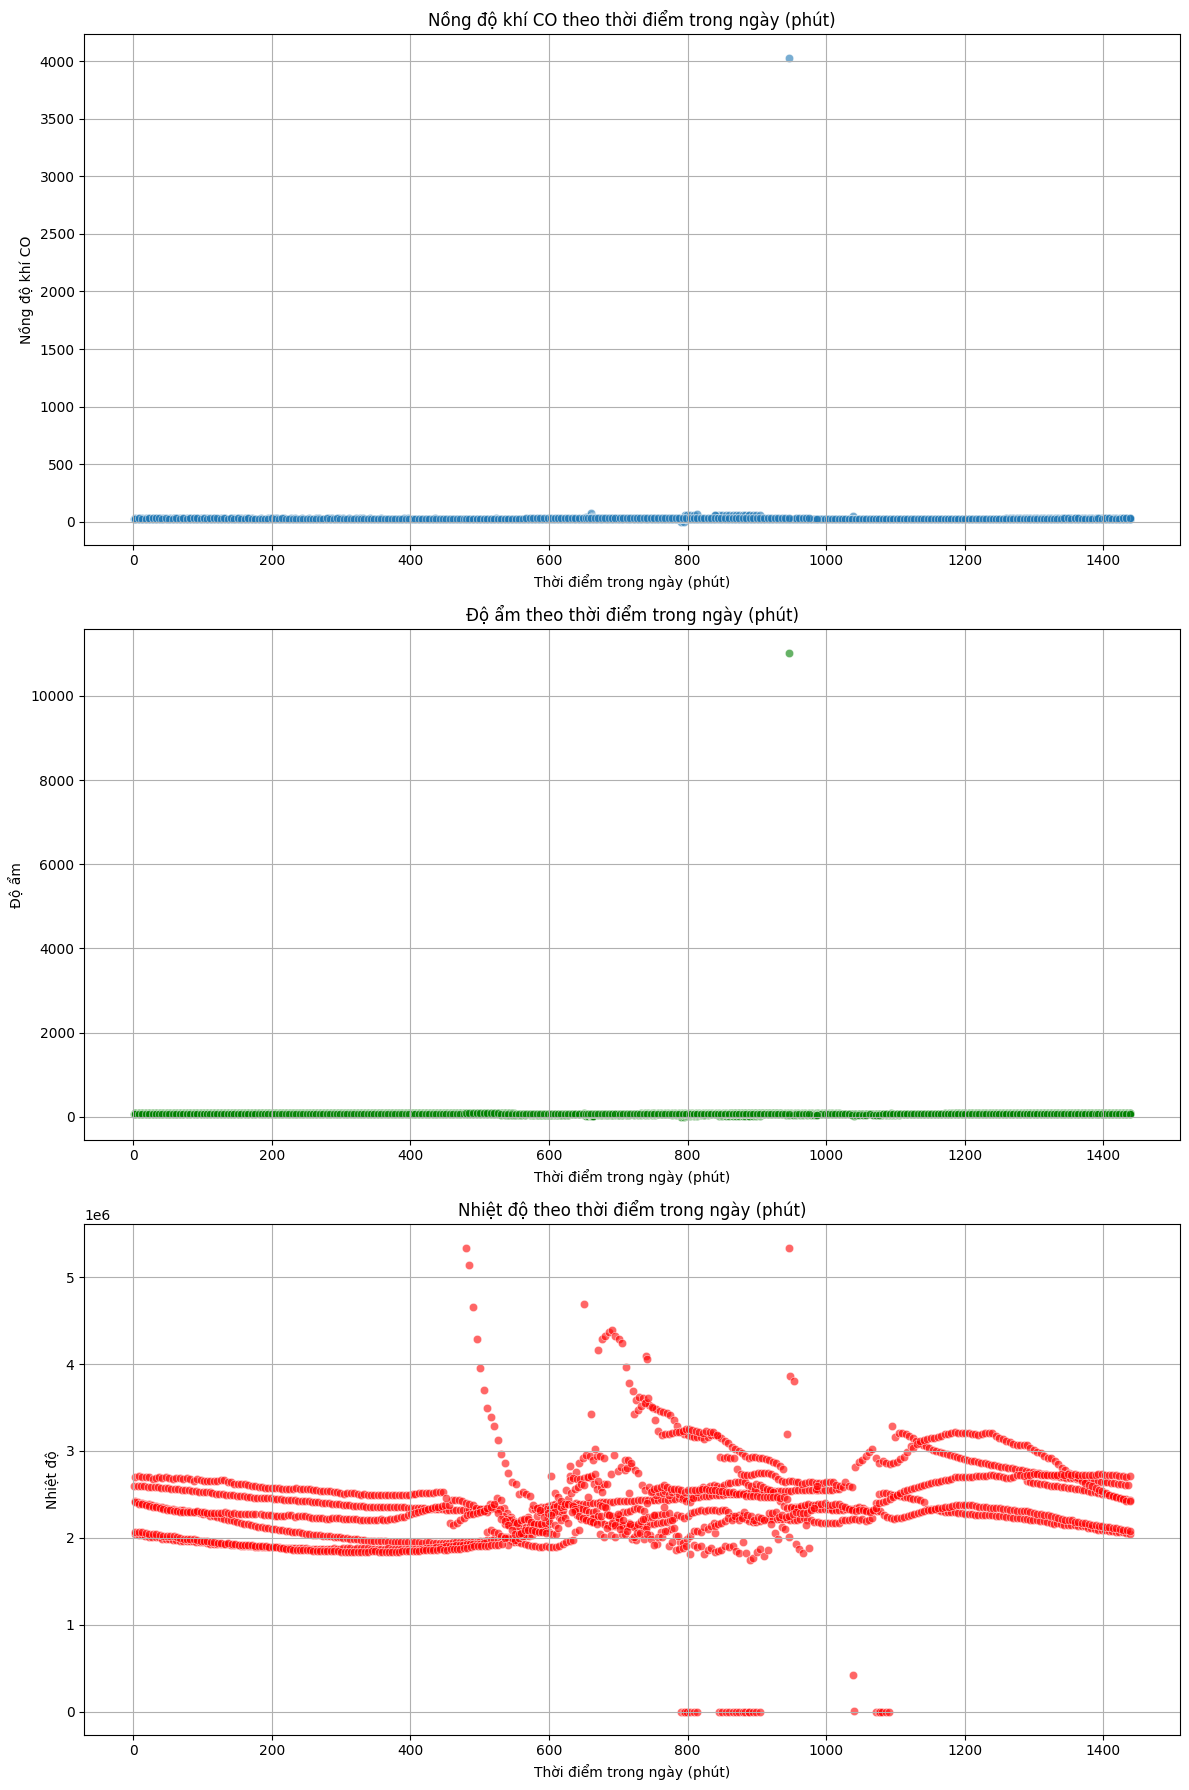

Huỳnh Thị Trúc Lam - 6351071040
Generated scatter plots for CO level, humidity, and temperature against minutes.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for three subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot co_level vs minutes
sns.scatterplot(data=df_filtered, x='minutes', y='co_level', ax=axes[0], alpha=0.6)
axes[0].set_title('Nồng độ khí CO theo thời điểm trong ngày (phút)')
axes[0].set_xlabel('Thời điểm trong ngày (phút)')
axes[0].set_ylabel('Nồng độ khí CO')
axes[0].grid(True)

# Plot humidity vs minutes
sns.scatterplot(data=df_filtered, x='minutes', y='humidity', ax=axes[1], alpha=0.6, color='green')
axes[1].set_title('Độ ẩm theo thời điểm trong ngày (phút)')
axes[1].set_xlabel('Thời điểm trong ngày (phút)')
axes[1].set_ylabel('Độ ẩm')
axes[1].grid(True)

# Plot temperature vs minutes
sns.scatterplot(data=df_filtered, x='minutes', y='temperature', ax=axes[2], alpha=0.6, color='red')
axes[2].set_title('Nhiệt độ theo thời điểm trong ngày (phút)')
axes[2].set_xlabel('Thời điểm trong ngày (phút)')
axes[2].set_ylabel('Nhiệt độ')
axes[2].grid(True)

plt.tight_layout()
plt.show()

print("Huỳnh Thị Trúc Lam - 6351071040")
print("Generated scatter plots for CO level, humidity, and temperature against minutes.")